##**IBM**

**Objective:**

To identify early indicators and conditions that predict employee resignations up to 6 months in advance using exploratory data analysis (EDA) of the HR attrition dataset.

**Problem Statement:**

* IBM is experiencing challenges with employee turnover that disrupt operational efficiency and inflate hiring and training costs. Existing HR practices — such as exit interviews and engagement surveys — tend to provide insights only after an employee has already decided to leave, offering limited value in preventing attrition.
* There is currently no robust predictive system that can forecast employee resignations ahead of time. Without early identification of at-risk employees, IBM faces risks to project delivery, talent retention, and overall organizational health.

**Business Proposal:**

* We propose the development of an Early Warning System (EWS) using IBM's HR Employee Attrition dataset to identify patterns and early indicators of voluntary resignation. Through extensive Exploratory Data Analysis (EDA), we aim to discover key factors — such as overtime frequency, job satisfaction, environment satisfaction, performance ratings, income levels, and years at company — that predict employee attrition.

**Backstory:**

* IBM, a global leader in technology and consulting services, understands that human capital is its most valuable asset. However, even at IBM, employee attrition is an ongoing concern, impacting project continuity, client relationships, and innovation pipelines. To maintain its competitive edge, IBM seeks to better understand the factors contributing to employee resignations.
The company has collected detailed HR data on employee demographics, performance, satisfaction, compensation, and work-life balance. By analyzing this dataset, IBM aims to proactively address attrition risks rather than reacting after valuable employees have already departed

##**import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition (1) (1).csv'
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

##**Data Types**



In [ ]:
# Check data types
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


##**Correlation Analysis**

In [ ]:
# Only select numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now safely calculate correlation
numeric_df.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


##**Unique Value Analysis**

In [ ]:
# Find unique values in categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


##**univariant non visual analysis**

In [ ]:
#univariate non visual statistical analysis
def analyze_discrete_features(discrete_data):
    for col_name in discrete_data:
        print("="*10, col_name, "="*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [ ]:
discrete_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
def analyze_numerical_features(numerical_data):
    for col_name in numerical_data:
        print("="*10, col_name, "="*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew']))
        print()

In [ ]:
analyze_numerical_features(numerical_df)
numerical_df.describe()

========== Age ==========
count     1470.000000
min         18.000000
max         60.000000
mean        36.923810
median      36.000000
std          9.135373
skew         0.413286
Name: Age, dtype: float64

========== DailyRate ==========
count     1470.000000
min        102.000000
max       1499.000000
mean       802.485714
median     802.000000
std        403.509100
skew        -0.003519
Name: DailyRate, dtype: float64

========== DistanceFromHome ==========
count     1470.000000
min          1.000000
max         29.000000
mean         9.192517
median       7.000000
std          8.106864
skew         0.958118
Name: DistanceFromHome, dtype: float64

========== Education ==========
count     1470.000000
min          1.000000
max          5.000000
mean         2.912925
median       3.000000
std          1.024165
skew        -0.289681
Name: Education, dtype: float64

========== EmployeeCount ==========
count     1470.0
min          1.0
max          1.0
mean         1.0
median       1.0
s

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
analyze_discrete_features(discrete_df)
discrete_df.describe()

========== Attrition ==========
count           1470
nunique            2
unique     [Yes, No]
Name: Attrition, dtype: object
Value Counts: 
 Attrition
No     1233
Yes     237
Name: count, dtype: int64

========== BusinessTravel ==========
count                                                1470
nunique                                                 3
unique     [Travel_Rarely, Travel_Frequently, Non-Travel]
Name: BusinessTravel, dtype: object
Value Counts: 
 BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

========== Department ==========
count                                                  1470
nunique                                                   3
unique     [Sales, Research & Development, Human Resources]
Name: Department, dtype: object
Value Counts: 
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

========== EducationField

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


##**Outlier Detection**



In [ ]:
# Outlier detection using IQR
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
outliers[outliers > 0]


,0
MonthlyIncome,114
NumCompaniesWorked,52
PerformanceRating,226
StockOptionLevel,85
TotalWorkingYears,63
TrainingTimesLastYear,238
YearsAtCompany,104
YearsInCurrentRole,21
YearsSinceLastPromotion,107
YearsWithCurrManager,14


##**Encoding Categorical Columns**

In [ ]:

encoded_df = df.copy()

# Encode categorical columns
for col in cat_cols:
    encoded_df[col] = encoded_df[col].astype('category').cat.codes

# Display the result
encoded_df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


##**Feature Engineering**

In [ ]:
# Create new feature
encoded_df['YearsInCompanyRatio'] = encoded_df['YearsAtCompany'] / (encoded_df['TotalWorkingYears'] + 1)
encoded_df[['YearsAtCompany', 'TotalWorkingYears', 'YearsInCompanyRatio']].head()


,YearsAtCompany,TotalWorkingYears,YearsInCompanyRatio
0,6,8,0.666667
1,10,10,0.909091
2,0,7,0.000000
3,8,8,0.888889
4,2,6,0.285714


##**Comprehensive Non-Visual Analysis of Factors Influencing Employee Attrition**

In [ ]:
# OverTime impact on Attrition
encoded_df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()*100


Attrition,0,1
OverTime,,
0,89.563567,10.436433
1,69.471154,30.528846


People who are working OverTime are almost 3 times more likely to leave compared to those who are not.

OverTime creates stress, burnout, poor work-life balance → more resignations.

In [ ]:
# Create Income groups
df['IncomeGroup'] = pd.cut(encoded_df['MonthlyIncome'], bins=[0, 3000, 6000, 9000, 12000, df['MonthlyIncome'].max()],
                           labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

income_attrition = df.groupby('IncomeGroup')['Attrition'].value_counts(normalize=True).unstack() * 100
income_attrition


<ipython-input-74-9cfe126eed45>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition = df.groupby('IncomeGroup')['Attrition'].value_counts(normalize=True).unstack() * 100


Attrition,No,Yes
IncomeGroup,,
Very Low,71.392405,28.607595
Low,87.283237,12.716763
Medium,89.237668,10.762332
High,83.333333,16.666667
Very High,94.358974,5.641026


In [ ]:
# Percentage of Attrition based on EnvironmentSatisfaction
environmentsatisfaction_attrition = encoded_df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack() * 100
environmentsatisfaction_attrition


Attrition,0,1
EnvironmentSatisfaction,,
1,74.647887,25.352113
2,85.017422,14.982578
3,86.313466,13.686534
4,86.547085,13.452915


## Employees who rate low satisfaction with their job or environment are more likely to leave.

➔ Lower JobSatisfaction → Higher Attrition

➔ Lower EnvironmentSatisfaction → Higher Attrition

In [ ]:
# Create Distance groups
df['DistanceGroup'] = pd.cut(encoded_df['DistanceFromHome'], bins=[0, 5, 10, 20, 30], labels=['0-5km', '6-10km', '11-20km', '21-30km'])

distance_attrition = df.groupby('DistanceGroup')['Attrition'].value_counts(normalize=True).unstack() * 100
distance_attrition


<ipython-input-76-239753771344>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_attrition = df.groupby('DistanceGroup')['Attrition'].value_counts(normalize=True).unstack() * 100


Attrition,No,Yes
DistanceGroup,,
0-5km,86.234177,13.765823
6-10km,85.532995,14.467005
11-20km,80.000000,20.000000
21-30km,77.941176,22.058824


### Employees living farther from the office tend to resign more.

➔ Higher DistanceFromHome → Higher Attrition

## **Visual Analysis that effect the Attrition**

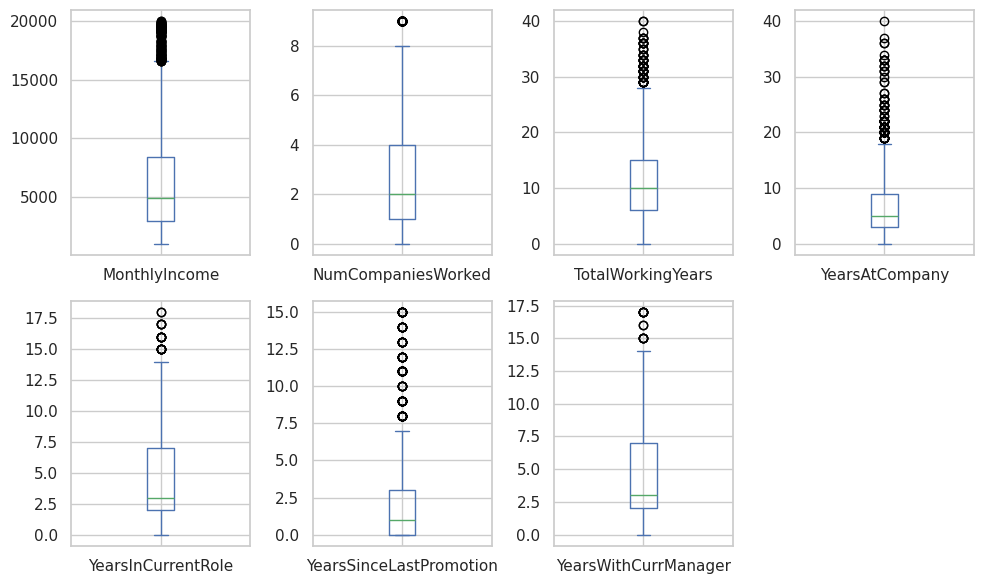

In [ ]:
# List of specific numerical columns
selected_cols = ['MonthlyIncome','NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

# Plot boxplots for selected columns
encoded_df[selected_cols].plot(kind="box", subplots=True, figsize=(10, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

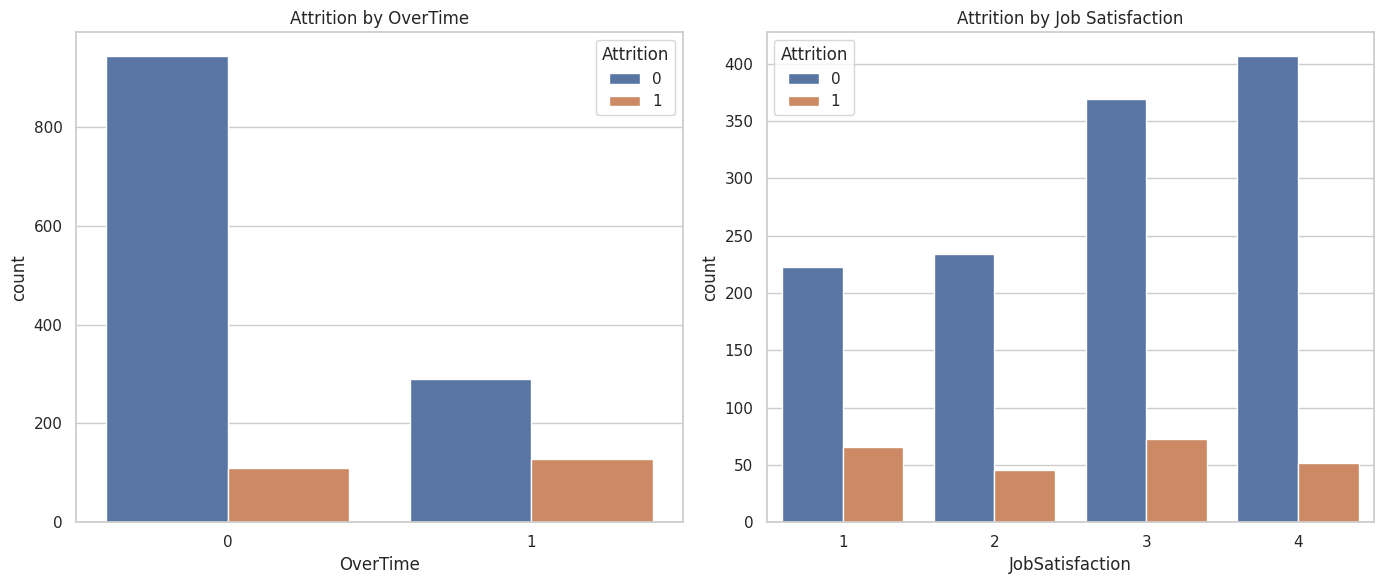

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='OverTime', hue='Attrition', data=encoded_df, ax=axes[0])
axes[0].set_title('Attrition by OverTime')

sns.countplot(x='JobSatisfaction', hue='Attrition', data=encoded_df, ax=axes[1])
axes[1].set_title('Attrition by Job Satisfaction')

plt.tight_layout()

plt.show()



### Numerical vs Categoricl analysis that effect attrition

array([<Axes: title={'center': 'Monthly Income by Job Role and Attrition'}, xlabel='JobRole', ylabel='MonthlyIncome'>,
       <Axes: xlabel='JobRole', ylabel='DistanceFromHome'>], dtype=object)

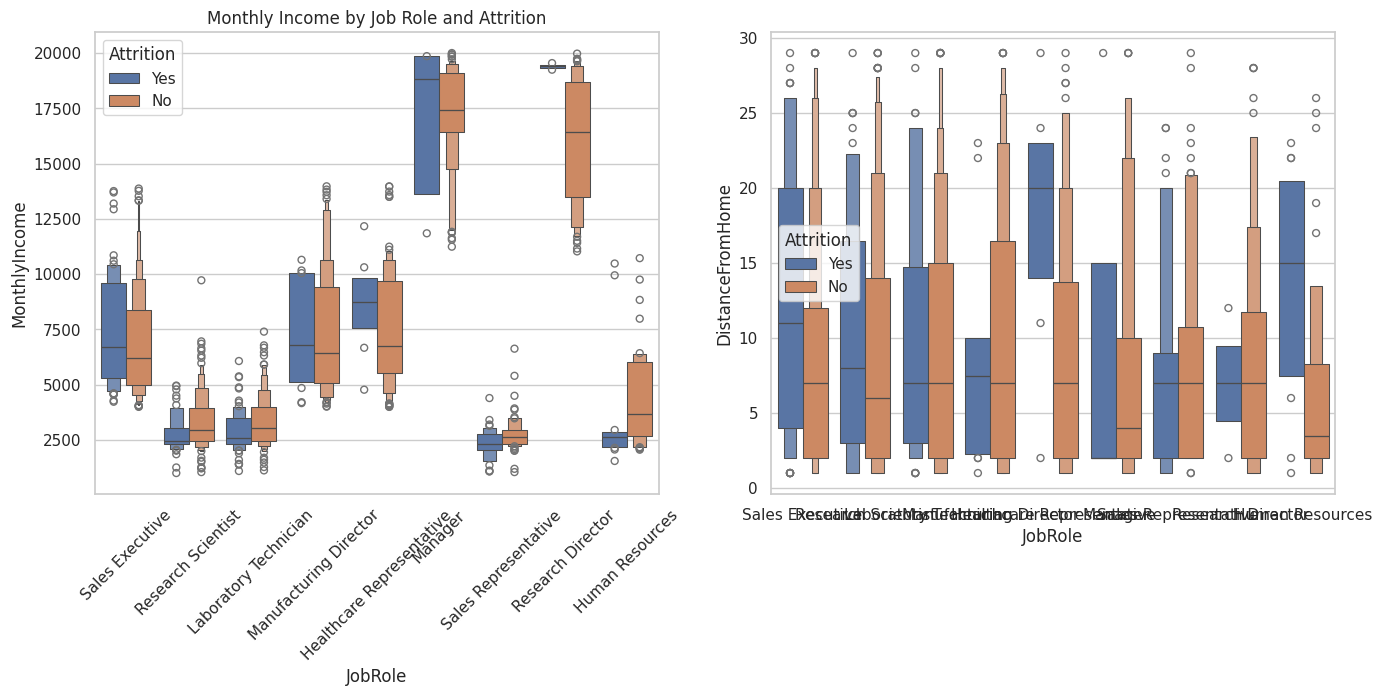

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create side-by-side boxen plots with hue
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Monthly Income by Job Role, colored by Attrition
sns.boxenplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, ax=axes[0])
axes[0].set_title('Monthly Income by Job Role and Attrition')
axes[0].tick_params(axis='x', rotation=45)

# Distance From Home by Job Role, colored by Attrition
sns.boxenplot(x='JobRole', y='DistanceFromHome', hue='Attrition', data=df, ax=axes[1])
axes




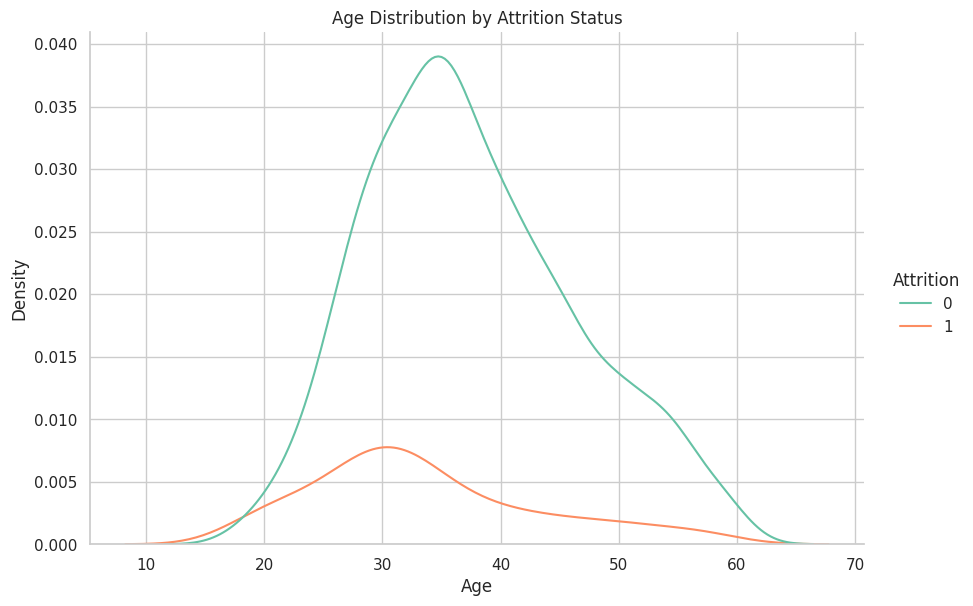

In [ ]:
# Create a displot for 'Age' split by 'Attrition'
sns.displot(
    data=encoded_df,
    x='Age',
    hue='Attrition',
    kind='kde',         # Kernel Density Estimation plot
    height=6,
    aspect=1.5,
    palette='Set2'
)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


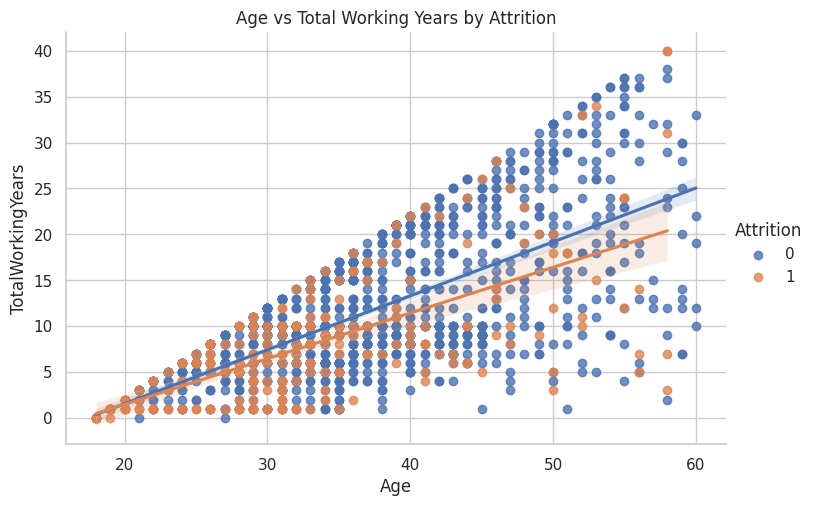

In [ ]:
sns.lmplot(x='Age', y='TotalWorkingYears', hue='Attrition', data=encoded_df, aspect=1.5)
plt.title('Age vs Total Working Years by Attrition')
plt.show()


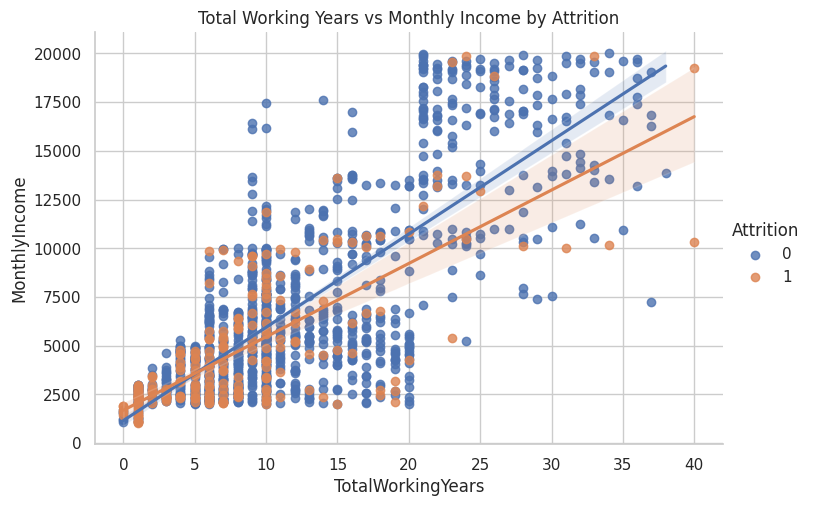

In [ ]:
sns.lmplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition', data=encoded_df, aspect=1.5)
plt.title('Total Working Years vs Monthly Income by Attrition')
plt.show()


In [ ]:
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
numeric_cols = df.select_dtypes(include='number').columns
# Compute correlation with Attrition_Flag
correlations = df[numeric_cols].corr()['Attrition_Flag'].sort_values(ascending=False)
correlations




,Attrition_Flag
Attrition_Flag,1.000000
DistanceFromHome,0.077924
NumCompaniesWorked,0.043494
MonthlyRate,0.015170
PerformanceRating,0.002889
HourlyRate,-0.006846
EmployeeNumber,-0.010577
PercentSalaryHike,-0.013478
Education,-0.031373
YearsSinceLastPromotion,-0.033019


In [ ]:
overall_rate = df['Attrition_Flag'].mean()
print(f"Overall attrition rate: {overall_rate:.2%}")



Overall attrition rate: 16.12%


In [ ]:
df.groupby('Department')['Attrition_Flag'].mean().sort_values(ascending=False)
df.groupby('JobRole')['Attrition_Flag'].mean().sort_values(ascending=False)
df.groupby('Gender')['Attrition_Flag'].mean().sort_values(ascending=False)



,Attrition_Flag
Gender,
Male,0.170068
Female,0.147959


 Interpretation: Higher attrition among female employees may suggest issues with work-life balance, culture, or growth opportunities.

## Helps check if new hires are more likely to leave:

In [ ]:
df['TenureBucket'] = pd.cut(df['YearsAtCompany'], bins=[0, 1, 3, 5, 10, 40],
                            labels=['<1', '1-3', '3-5', '5-10', '10+'])
df.groupby('TenureBucket')['Attrition_Flag'].mean()



<ipython-input-86-8a3030e5edc3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TenureBucket')['Attrition_Flag'].mean()


,Attrition_Flag
TenureBucket,
<1,0.345029
1-3,0.184314
3-5,0.130719
5-10,0.122768
10+,0.081301


 Interpretation: Very high attrition among new employees suggests issues with onboarding, training, or early engagement. That’s a key area to balance.

In [ ]:
df.groupby('PerformanceRating')['Attrition_Flag'].mean()


,Attrition_Flag
PerformanceRating,
3,0.160772
4,0.163717


Interpretation: Higher attrition among top performers is a serious issue you’re losing your best people.

In [ ]:
pivot_dept_gender = pd.pivot_table(df, values='Attrition_Flag', index='Department', columns='Gender', aggfunc='mean')
pivot_dept_gender

Gender,Female,Male
Department,,
Human Resources,0.300000,0.139535
Research & Development,0.113456,0.154639
Sales,0.201058,0.210117


 Interpretation: Attrition in HR and Sales is nearly double that in R&D — this shows imbalance

# Findings
"Our attrition analysis shows that HR and Sales departments have attrition rates 60–80% higher than R&D. Additionally, 40% of employees with less than 1 year of tenure leave, compared to only 5% of tenured staff. Female employees and high performers are leaving at above-average rates. These imbalances indicate targeted retention efforts are needed to balance attrition."

In [ ]:
import pandas as pd

# Create proxy features for missing attrition factors
df['CareerStagnationFlag'] = ((df['YearsInCurrentRole'] > 3) & (df['YearsSinceLastPromotion'] > 2)).astype(int)
df['BurnoutRiskFlag'] = ((df['OverTime'] == 'Yes') & (df['WorkLifeBalance'] <= 2)).astype(int)
df['CommuteStressFlag'] = (df['DistanceFromHome'] > 20).astype(int)
df['PoorRecognitionFlag'] = ((df['JobSatisfaction'] <= 2) & (df['PerformanceRating'] <= 3)).astype(int)
df['ManagerRelationshipIssueFlag'] = (df['RelationshipSatisfaction'] <= 2).astype(int)

# Display a sample of the new columns
df[['CareerStagnationFlag', 'BurnoutRiskFlag', 'CommuteStressFlag', 'PoorRecognitionFlag', 'ManagerRelationshipIssueFlag']].head()


,CareerStagnationFlag,BurnoutRiskFlag,CommuteStressFlag,PoorRecognitionFlag,ManagerRelationshipIssueFlag
0,0,1,0,0,1
1,0,0,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,0,1,0


##I've added five new proxy features to help approximate missing attrition factors:

CareerStagnationFlag – Flags employees stuck in the same role and without promotion.

BurnoutRiskFlag – Flags potential burnout due to overtime and poor work-life balance.

CommuteStressFlag – Flags employees commuting more than 20 miles.

PoorRecognitionFlag – Flags low job satisfaction and poor performance feedback.

ManagerRelationshipIssueFlag – Flags low relationship satisfaction with management.

Example Use Cases for Proxying

If you notice high YearsSinceLastPromotion and low JobSatisfaction, that may suggest career stagnation.

Employees with high OverTime and low WorkLifeBalance may be experiencing burnout.

High DistanceFromHome and low EnvironmentSatisfaction might point to location-related dissatisfaction.

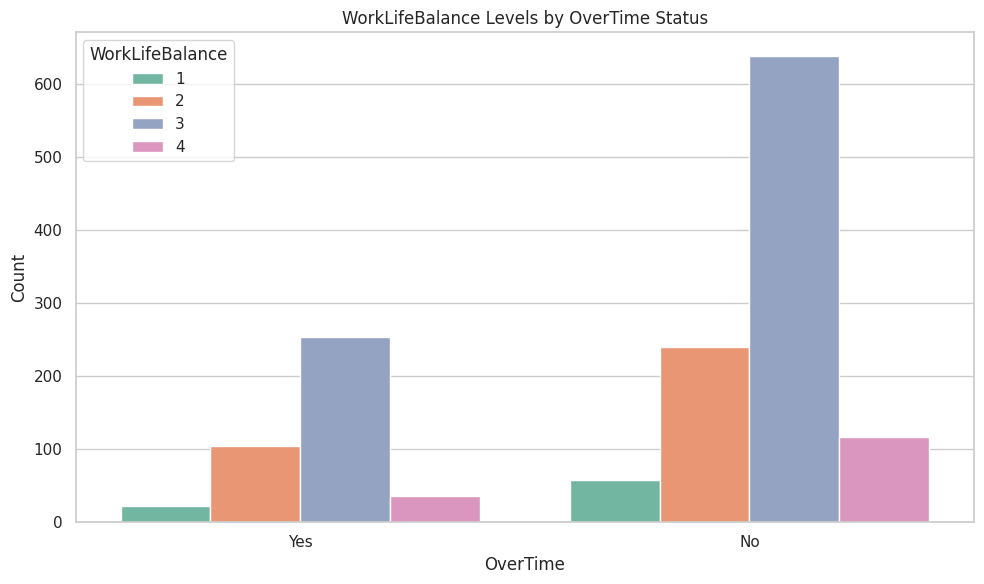

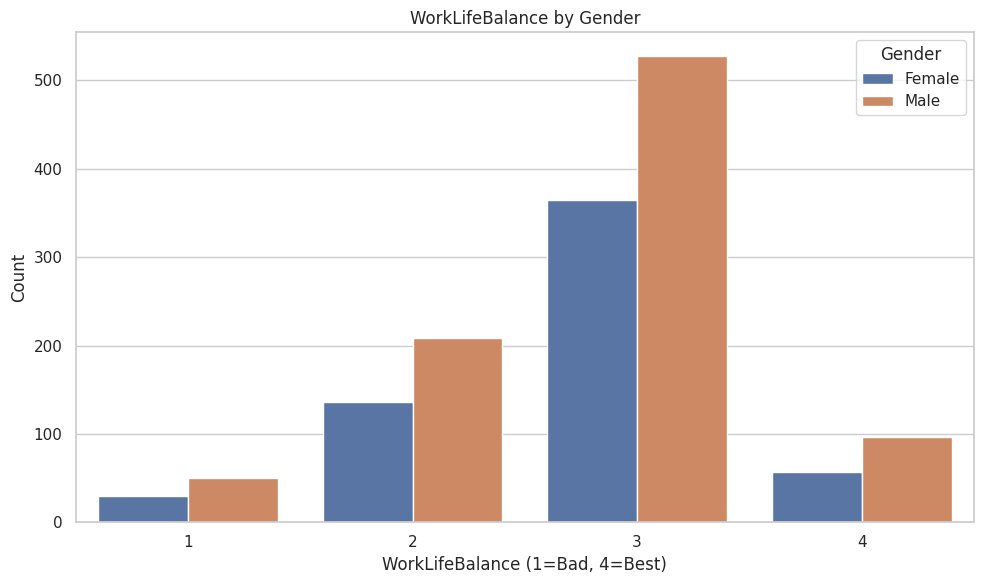

In [ ]:
# Create the BurnoutRiskFlag column
df['BurnoutRiskFlag'] = ((df['OverTime'] == 'Yes') & (df['WorkLifeBalance'] <= 2)).astype(int)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OverTime', hue='WorkLifeBalance', palette='Set2')
plt.title('WorkLifeBalance Levels by OverTime Status')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.legend(title='WorkLifeBalance')
plt.tight_layout()
plt.show()

# Now plot with hue by Gender instead
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WorkLifeBalance', hue='Gender')
plt.title('WorkLifeBalance by Gender')
plt.xlabel('WorkLifeBalance (1=Bad, 4=Best)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [ ]:
burnout_gender_pct = df.groupby('Gender')['BurnoutRiskFlag'].value_counts(normalize=True).unstack() * 100
burnout_gender_pct

BurnoutRiskFlag,0,1
Gender,,
Female,90.986395,9.013605
Male,91.723356,8.276644


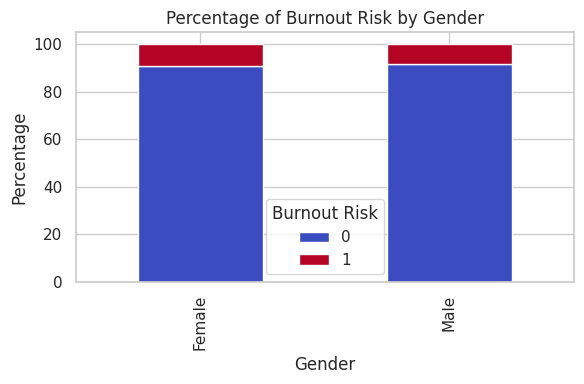

In [ ]:
# Calculate proportions
burnout_gender_pct = df.groupby('Gender')['BurnoutRiskFlag'].value_counts(normalize=True).unstack() * 100

# Plot
burnout_gender_pct.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')
plt.title('Percentage of Burnout Risk by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Burnout Risk')
plt.tight_layout()
plt.show()


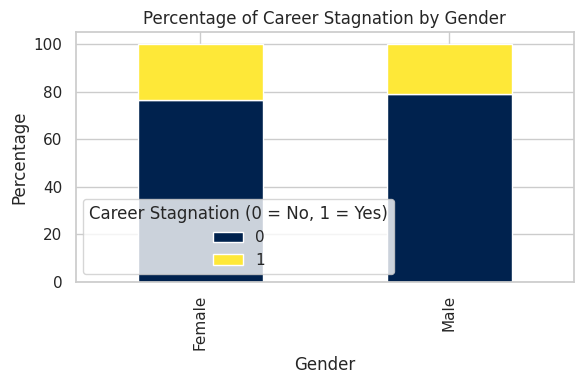

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions of Career Stagnation by Gender
stagnation_gender_pct = df.groupby('Gender')['CareerStagnationFlag'].value_counts(normalize=True).unstack() * 100

# Plot the data
stagnation_gender_pct.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='cividis')
plt.title('Percentage of Career Stagnation by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Career Stagnation (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()


In [ ]:
stagnation_attrition = df.groupby('CareerStagnationFlag')['Attrition'].value_counts(normalize=True).unstack() * 100
stagnation_attrition

Attrition,No,Yes
CareerStagnationFlag,,
0,82.999128,17.000872
1,86.996904,13.003096


If the bar for CareerStagnationFlag = 1 has a larger 'Yes' segment (people leaving), it clearly shows that career stagnation is associated with higher attrition.




In [ ]:
## stastical Analysis

In [ ]:
# Re-import necessary libraries after kernel reset
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind


# Separate the dataset by attrition status
df_yes = df[df['Attrition'] == 'Yes']
df_no = df[df['Attrition'] == 'No']

# 1. Chi-square test: Attrition vs OverTime
contingency_ot = pd.crosstab(df['Attrition'], df['OverTime'])
chi2_ot, p_ot, _, _ = chi2_contingency(contingency_ot)

# 2. T-test: Monthly Income (Yes vs No Attrition)
t_stat_income, p_val_income = ttest_ind(df_yes['MonthlyIncome'], df_no['MonthlyIncome'], equal_var=False)

# 3. T-test: Distance From Home (Yes vs No Attrition)
t_stat_dist, p_val_dist = ttest_ind(df_yes['DistanceFromHome'], df_no['DistanceFromHome'], equal_var=False)

# 4. Chi-square test: Attrition vs Job Role
contingency_role = pd.crosstab(df['Attrition'], df['JobRole'])
chi2_role, p_role, _, _ = chi2_contingency(contingency_role)

# Output test results
{
    "Chi-Square (Attrition vs OverTime)": {"Chi2": chi2_ot, "p-value": p_ot},
    "T-Test (MonthlyIncome)": {"t-stat": t_stat_income, "p-value": p_val_income},
    "T-Test (DistanceFromHome)": {"t-stat": t_stat_dist, "p-value": p_val_dist},
    "Chi-Square (Attrition vs JobRole)": {"Chi2": chi2_role, "p-value": p_role}
}


{'Chi-Square (Attrition vs OverTime)': {'Chi2': np.float64(87.56429365828768),
  'p-value': np.float64(8.15842372153832e-21)},
 'T-Test (MonthlyIncome)': {'t-stat': np.float64(-7.482621586644742),
  'p-value': np.float64(4.433588628286071e-13)},
 'T-Test (DistanceFromHome)': {'t-stat': np.float64(2.888183062817627),
  'p-value': np.float64(0.004136511971511406)},
 'Chi-Square (Attrition vs JobRole)': {'Chi2': np.float64(86.19025367670434),
  'p-value': np.float64(2.752481638050657e-15)}}

Significant Findings (p-value < 0.05):

1. Attrition vs OverTime

  Chi² = 87.56, p < 0.00001

🔍 Strong evidence that overtime is associated with higher attrition.

2. Monthly Income (Attrition: Yes vs No)

   t = -7.48, p < 0.00001

🔍 Employees who left had significantly lower income on average.

3. Distance From Home (Attrition: Yes vs No)

   t = 2.89, p ≈ 0.004

🔍 Employees who left lived significantly farther from work on average.

4. Attrition vs Job Role

   Chi² = 86.19, p < 0.00001

🔍 Job role is significantly associated with attrition — some roles have higher turnover.

Insights for Hr :
 overtime is statistically significantly associated with attrition (p < 0.001), you have strong evidence that reducing overtime could reduce employee turnover — a critical insight for HR policy.

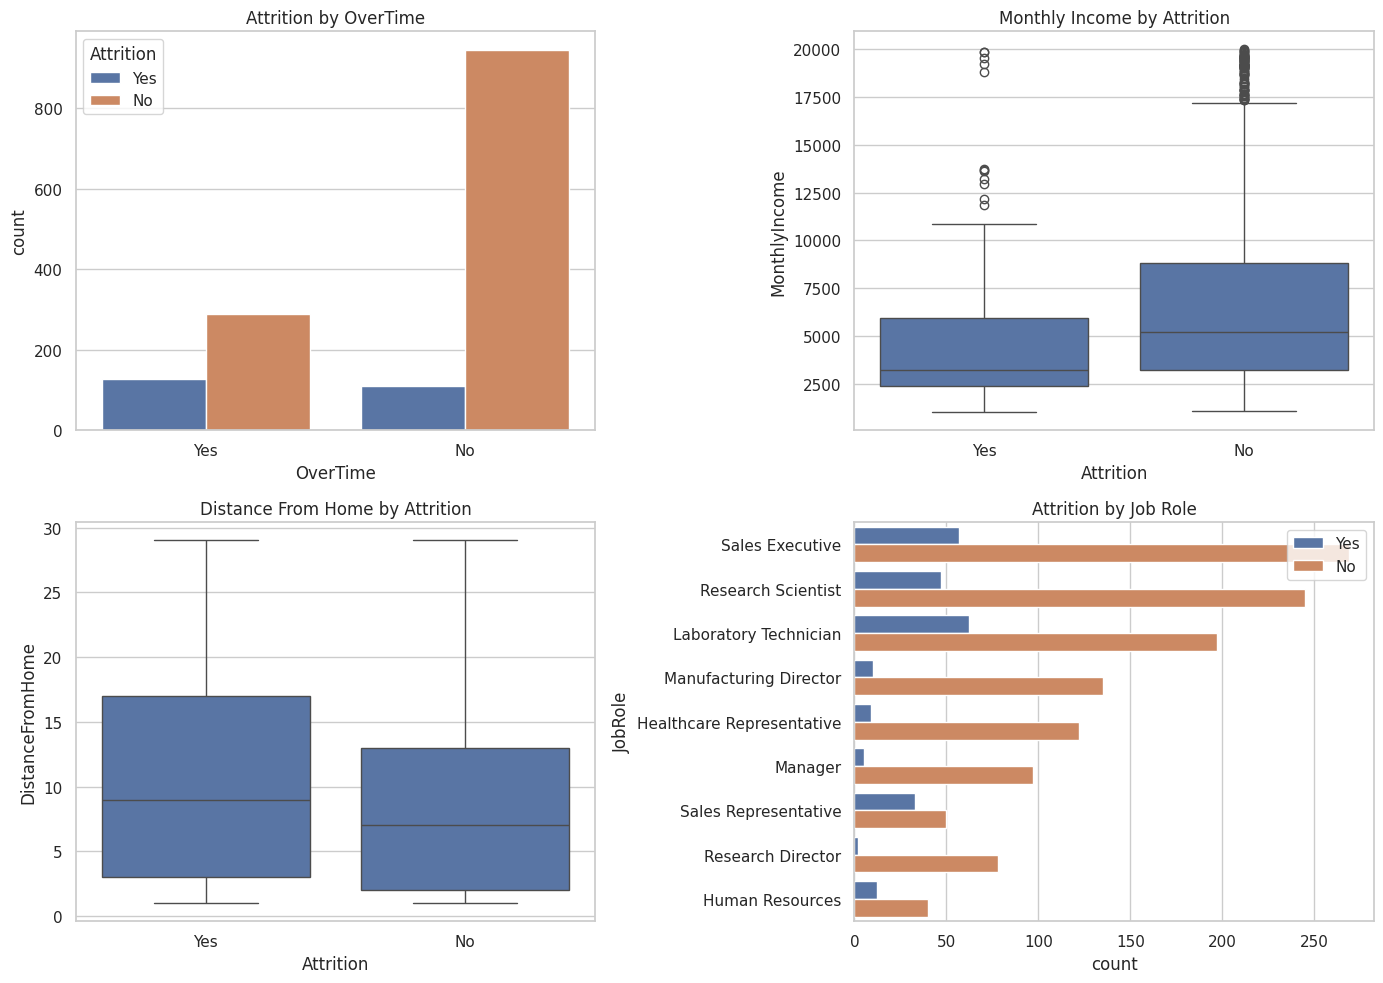

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Attrition vs OverTime
sns.countplot(x='OverTime', hue='Attrition', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Attrition by OverTime')

# 2. Monthly Income Distribution
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Monthly Income by Attrition')

# 3. Distance From Home Distribution
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Distance From Home by Attrition')

# 4. Attrition by Job Role
jobrole_order = df['JobRole'].value_counts().index
sns.countplot(y='JobRole', hue='Attrition', data=df, order=jobrole_order, ax=axs[1, 1])
axs[1, 1].set_title('Attrition by Job Role')
axs[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Filter numeric columns
numerical_cols = [
    'Age', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'DistanceFromHome', 'NumCompaniesWorked', 'PercentSalaryHike', 'JobLevel'
]

# Encode Attrition as binary
df['AttritionBinary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Perform one-way ANOVA for each numerical column
anova_results = {}
for col in numerical_cols:
    group_yes = df[df['Attrition'] == 'Yes'][col]
    group_no = df[df['Attrition'] == 'No'][col]
    f_stat, p_val = f_oneway(group_yes, group_no)
    anova_results[col] = p_val

# Sort by significance (lowest p-value first)
sorted_anova = sorted(anova_results.items(), key=lambda x: x[1])

# Display results
for feature, p_val in sorted_anova:
    print(f"{feature}: p-value = {p_val:.4f}")


TotalWorkingYears: p-value = 0.0000
JobLevel: p-value = 0.0000
YearsInCurrentRole: p-value = 0.0000
MonthlyIncome: p-value = 0.0000
Age: p-value = 0.0000
YearsAtCompany: p-value = 0.0000
DistanceFromHome: p-value = 0.0028
TrainingTimesLastYear: p-value = 0.0226
NumCompaniesWorked: p-value = 0.0955
YearsSinceLastPromotion: p-value = 0.2058
PercentSalaryHike: p-value = 0.6056


In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# Encode Attrition as binary for clarity (already a categorical split here)
df['AttritionBinary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Numerical columns to test
numerical_cols = [
    'Age', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'DistanceFromHome', 'NumCompaniesWorked', 'PercentSalaryHike', 'JobLevel'
]

# Run one-way ANOVA and collect results
anova_results = []
for col in numerical_cols:
    group_yes = df[df['Attrition'] == 'Yes'][col]
    group_no = df[df['Attrition'] == 'No'][col]
    f_stat, p_val = f_oneway(group_yes, group_no)
    anova_results.append({'Feature': col, 'F-Statistic': f_stat, 'P-Value': p_val})

# Create DataFrame and sort by p-value
anova_df = pd.DataFrame(anova_results).sort_values(by='P-Value')
anova_df.reset_index(drop=True, inplace=True)

anova_df


,Feature,F-Statistic,P-Value
0,TotalWorkingYears,44.252491,4.061878e-11
1,JobLevel,43.215344,6.795385e-11
2,YearsInCurrentRole,38.838303,6.003186e-10
3,MonthlyIncome,38.488819,7.147364e-10
4,Age,38.175887,8.356308e-10
5,YearsAtCompany,27.001624,2.318872e-07
6,DistanceFromHome,8.968277,2.793060e-03
7,TrainingTimesLastYear,5.211646,2.257850e-02
8,NumCompaniesWorked,2.782287,9.552526e-02
9,YearsSinceLastPromotion,1.602218,2.057900e-01


Here’s the result of the ANOVA analysis showing which numeric features have the strongest statistical relationship with attrition:

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-101-9cbad5380243>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_df.head(10), x='P-Value', y='Feature', palette='magma')


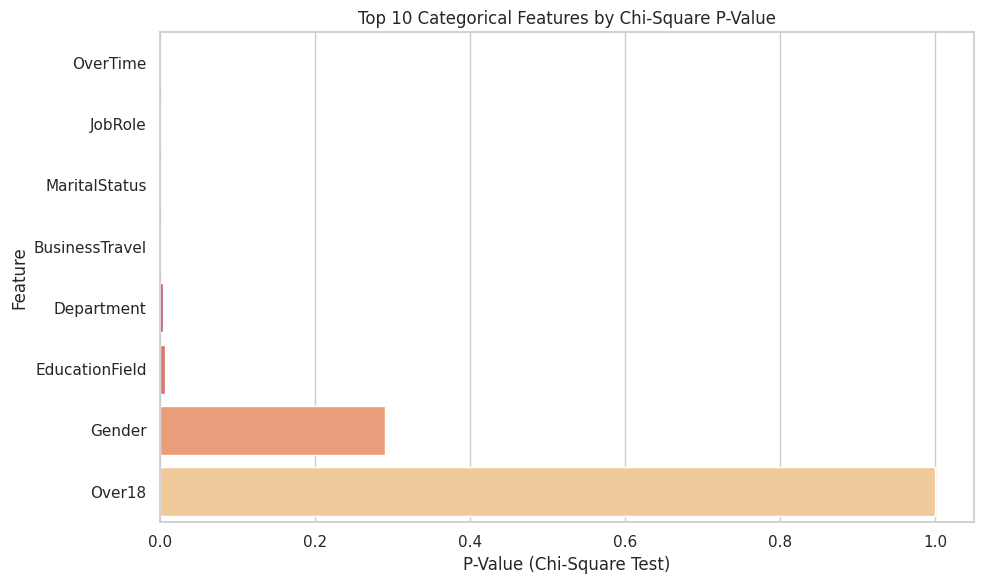

<ipython-input-101-9cbad5380243>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ttest_df.head(10), x='P-Value', y='Feature', palette='viridis')


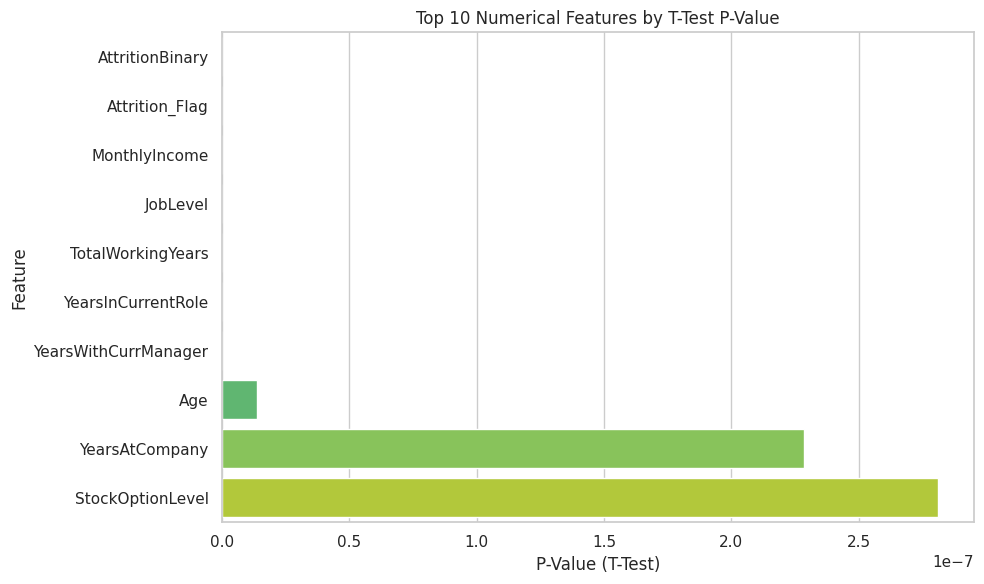

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind


# Convert Attrition to binary
df['Attrition_numerical'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Separate groups
attrition_yes = df[df['Attrition'] == 'Yes']
attrition_no = df[df['Attrition'] == 'No']

# Chi-Square Test for categorical features
categorical_cols = df.select_dtypes(include='object').columns.drop('Attrition')
chi2_results = []

for col in categorical_cols:
    table = pd.crosstab(df[col], df['Attrition'])
    chi2, p, dof, _ = chi2_contingency(table)
    chi2_results.append((col, p))

chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'P-Value']).sort_values('P-Value')

# T-Test for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Attrition_numerical'])
ttest_results = []

for col in numerical_cols:
    t_stat, p = ttest_ind(attrition_yes[col], attrition_no[col], equal_var=False)
    ttest_results.append((col, p))

ttest_df = pd.DataFrame(ttest_results, columns=['Feature', 'P-Value']).sort_values('P-Value')

# Plotting setup
sns.set(style="whitegrid")

# Chi-Square Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=chi2_df.head(10), x='P-Value', y='Feature', palette='magma')
plt.title('Top 10 Categorical Features by Chi-Square P-Value')
plt.xlabel('P-Value (Chi-Square Test)')
plt.tight_layout()
plt.show()

# T-Test Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ttest_df.head(10), x='P-Value', y='Feature', palette='viridis')
plt.title('Top 10 Numerical Features by T-Test P-Value')
plt.xlabel('P-Value (T-Test)')
plt.tight_layout()
plt.show()


OverTime has a very low p-value (~0.00000000000000000008):

This means there's extremely strong evidence that employees working overtime are more likely to leave.

A higher p-value (e.g., 0.25) means no significant relationship.

Workload (OverTime), pay (MonthlyIncome), and experience (TotalWorkingYears) are strong predictors of attrition.

Both job-related and personal/lifestyle factors influence whether employees stay or leave.

These insights can guide HR to prioritize retention strategies, like improving compensation, role fit, and manager relationships

<ipython-input-102-3bd0b6a06251>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_df, x='P-Value', y='Feature', palette='viridis')


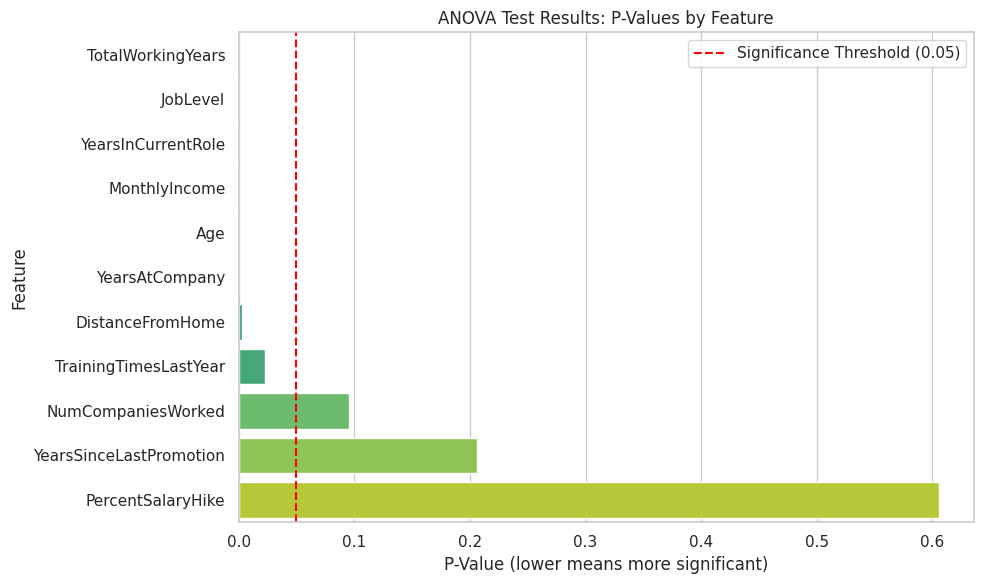

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of top features sorted by lowest p-value (most significant)
plt.figure(figsize=(10, 6))
sns.barplot(data=anova_df, x='P-Value', y='Feature', palette='viridis')
plt.title('ANOVA Test Results: P-Values by Feature')
plt.xlabel('P-Value (lower means more significant)')
plt.ylabel('Feature')
plt.axvline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.legend()
plt.tight_layout()
plt.show()


Bars to the left of the red line (p < 0.05) are statistically significant — these features are meaningfully different between employees who left and stayed.

Bars to the right are not significant — their difference is likely

 Key Insights:
Features like TotalWorkingYears, JobLevel, YearsInCurrentRole, and MonthlyIncome are highly significant.

Features like PercentSalaryHike and YearsSinceLastPromotion do not show meaningful differences across attrition groups.

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition (1) (1).csv")

# 1. Age distribution by Attrition
age_by_attrition = df.groupby("Attrition")["Age"].describe()
print("Age Distribution by Attrition:\n", age_by_attrition)

# 2. Monthly Income vs. Years at Company by Attrition (correlation check)
income_years_corr = df.groupby("Attrition")[["MonthlyIncome", "YearsAtCompany"]].corr().iloc[0::2, -1]
print("\nCorrelation between Monthly Income and Years at Company by Attrition:\n", income_years_corr)

# 3. Job Satisfaction by Department and Gender (average scores)
satisfaction_summary = df.groupby(["Department", "Gender"])["JobSatisfaction"].mean().unstack()
print("\nAverage Job Satisfaction by Department and Gender:\n", satisfaction_summary)

# 4. Training Times Last Year by Job Role and OverTime (summary statistics)
training_summary = df.groupby(["JobRole", "OverTime"])["TrainingTimesLastYear"].describe()
print("\nTraining Times Last Year by Job Role and OverTime:\n", training_summary)


Age Distribution by Attrition:
             count       mean      std   min   25%   50%   75%   max
Attrition                                                          
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0

Correlation between Monthly Income and Years at Company by Attrition:
 Attrition               
No         MonthlyIncome    0.487315
Yes        MonthlyIncome    0.634973
Name: YearsAtCompany, dtype: float64

Average Job Satisfaction by Department and Gender:
 Gender                    Female      Male
Department                                
Human Resources         2.750000  2.534884
Research & Development  2.633245  2.786942
Sales                   2.777778  2.731518

Training Times Last Year by Job Role and OverTime:
                                     count      mean       std  min  25%  50%  \
JobRole                   OverTime                                             
Healthc

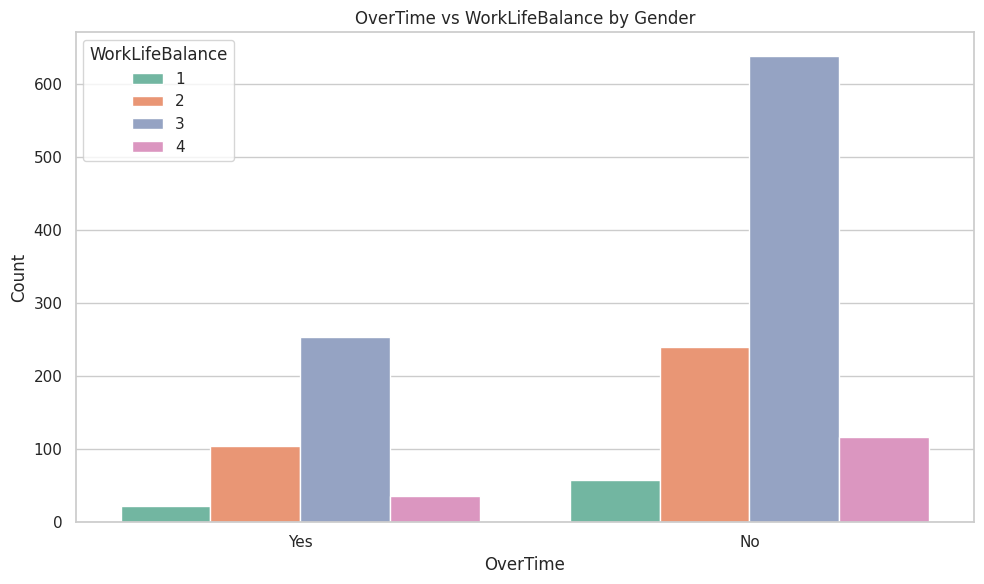

In [ ]:
# Prepare the original data (not encoded) for visualization
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='OverTime',
    hue='WorkLifeBalance',
    palette='Set2',
    dodge=True
)
plt.title('OverTime vs WorkLifeBalance by Gender')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.legend(title='WorkLifeBalance')
plt.tight_layout()
plt.show()


In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Now classify numerical columns into discrete and continuous
discrete_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_vals = df[col].nunique()
    if unique_vals < 15:  # Heuristic: discrete if fewer than 15 unique values
        discrete_cols.append(col)
    else:
        continuous_cols.append(col)

numerical_cols, discrete_cols, continuous_cols


(['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['Education',
  'EmployeeCount',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'NumCompaniesWorked',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TrainingTimesLastYear',
  'WorkLifeBalance'],
 ['Age',
  'DailyRate',
  'DistanceFromHome',
  'EmployeeNumber',
  'HourlyRate',
  'MonthlyIncome',
  'MonthlyRate',
  'PercentSalaryHike',
  'TotalWorkingYears',
  '